# Upper Confidence Bound (UCB)

### Importing libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [8]:
data = pd.read_csv("Ads_CTR_Optimisation.csv")

In [9]:
data

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


### Implementing UCB

In [12]:
import math
N = 5000
d = 10
ads_selected = []
number_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0,N):
  ad = 0
  max_upper_bound = 0
  for i in range(0,d):
    if (number_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / number_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n+1) / number_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400  # 1 * 10**400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  number_of_selections[ad] = number_of_selections[ad]+1
  reward = data.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

### visualising result

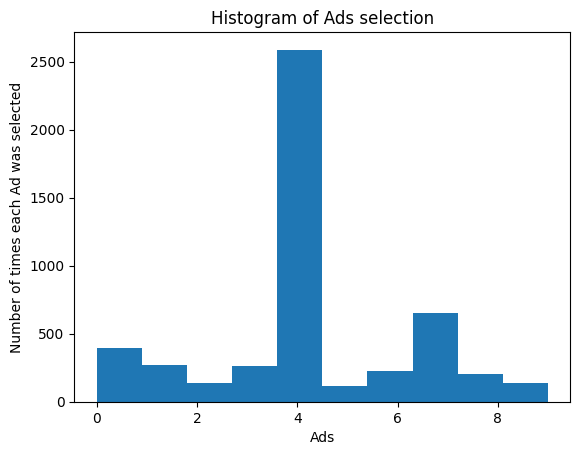

In [13]:
plt.hist(ads_selected)
plt.title("Histogram of Ads selection")
plt.xlabel("Ads")
plt.ylabel("Number of times each Ad was selected")
plt.show()